# 📊 Projeto Final - Index Tracking
## Bootcamp de Introdução à Data Science - 4ª Edição
### Parceria BAH + FINOR | Outubro 2025

---

## 🎯 Objetivo do Projeto

Desenvolver um modelo de **Index Tracking** para replicar os índices **S&P 100** e **IBOVESPA** utilizando um número reduzido de ativos, através de técnicas de **otimização matemática** e **machine learning**.

### Motivação

- Índices de mercado contêm centenas de ações
- Negociar todas as ações é custoso e complexo
- **Solução**: Replicar o índice com menos ativos mantendo alta fidelidade

---

## 📋 Estrutura do Notebook

1. **Coleta de Dados** - Download de histórico via Yahoo Finance
2. **Pré-processamento** - Limpeza e preparação dos dados
3. **Análise Exploratória** - EDA com visualizações e estatísticas
4. **Otimização** - Modelo matemático de Index Tracking
5. **Backtesting** - Validação in-sample e out-of-sample
6. **Resultados e Conclusões** - Análise final e insights

---

## 📦 1. Importação de Bibliotecas e Configuração

Importamos todas as bibliotecas necessárias e configuramos o ambiente.

In [56]:
# ============================================
# CONFIGURAÇÃO: Auto-reload
# ============================================
%load_ext autoreload
%autoreload 2

# Bibliotecas padrão
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Adicionar src ao path
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Nossos módulos customizados (serão auto-recarregados quando modificados)
from data_collection import DataCollector
from data_preprocessing import DataPreprocessor
from exploratory_analysis import ExploratoryAnalyzer
from optimization_model import IndexTrackingOptimizer
from backtesting import Backtester
from visualization import ResultsVisualizer

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 100

print("✓ Todas as bibliotecas importadas com sucesso!")
print("✓ Auto-reload ativado - alterações nos módulos .py serão detectadas automaticamente")
print(f"✓ Versão pandas: {pd.__version__}")
print(f"✓ Versão numpy: {np.__version__}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✓ Todas as bibliotecas importadas com sucesso!
✓ Auto-reload ativado - alterações nos módulos .py serão detectadas automaticamente
✓ Versão pandas: 2.2.3
✓ Versão numpy: 2.3.2


---

## 📊 2. Coleta de Dados

Coletamos dados históricos de **7 anos** (2018-2025) para:
- **Índice S&P 100** (^OEX) e suas ~100 ações componentes
- **Índice IBOVESPA** (^BVSP) e suas ~90 ações componentes

**Fonte**: Yahoo Finance via biblioteca `yfinance`

In [57]:
from datetime import datetime, timedelta

# Definir período de coleta (7 anos)
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=7*365)).strftime('%Y-%m-%d')

print(f"Período de coleta: {start_date} até {end_date}")

# Criar coletor de dados
collector = DataCollector(start_date, end_date)

Período de coleta: 2018-11-30 até 2025-11-28
✓ Período de coleta validado: 2018-11-30 até 2025-11-28
  Total de anos: 7.0


### 2.1 Coleta - S&P 100

In [58]:
# Coletar dados do S&P 100
sp100_index_data, sp100_stocks_data = collector.collect_all_data('SP100')

# Visualizar primeiras linhas
print("\n--- Dados do Índice S&P 100 ---")
print(sp100_index_data.head())

print("\n--- Dados das Ações S&P 100 ---")
print(sp100_stocks_data.head())

print(f"\n✓ S&P 100 coletado: {sp100_index_data.shape[0]} dias, {sp100_stocks_data.shape[1]} ações")


INICIANDO COLETA DE DADOS: SP100
✓ Lista S&P 100: 99 tickers

📊 Baixando dados do índice: ^OEX
✓ Download completo: 1757 dias de dados
  Período: 2018-11-30 até 2025-11-26
  Dados faltantes: 0

📈 Baixando dados de 99 ações...
  Lote 1/5: baixando 20 ações...
  ✓ Lote 1: 20 ações coletadas
  Lote 2/5: baixando 20 ações...
  ✓ Lote 2: 20 ações coletadas
  Lote 3/5: baixando 20 ações...
  ✓ Lote 3: 20 ações coletadas
  Lote 4/5: baixando 20 ações...
  ✓ Lote 4: 20 ações coletadas
  Lote 5/5: baixando 19 ações...
  ✓ Lote 5: 19 ações coletadas

✓ Download completo!
  Ações com sucesso: 99/99
  Período: 2018-11-30 até 2025-11-26
  Dados faltantes: 73

COLETA FINALIZADA: SP100


--- Dados do Índice S&P 100 ---
Price             Close         High          Low         Open      Volume
Ticker             ^OEX         ^OEX         ^OEX         ^OEX        ^OEX
Date                                                                      
2018-11-30  1225.189941  1225.189941  1211.699951  1214.2900

### 2.2 Coleta - IBOVESPA

In [59]:
# Coletar dados do IBOVESPA
ibov_index_data, ibov_stocks_data = collector.collect_all_data('IBOV')

# Visualizar primeiras linhas
print("\n--- Dados do Índice IBOVESPA ---")
print(ibov_index_data.head())

print("\n--- Dados das Ações IBOVESPA ---")
print(ibov_stocks_data.head())

print(f"\n✓ IBOVESPA coletado: {ibov_index_data.shape[0]} dias, {ibov_stocks_data.shape[1]} ações")


INICIANDO COLETA DE DADOS: IBOV
✓ Lista IBOVESPA: 73 tickers

📊 Baixando dados do índice: ^BVSP
✓ Download completo: 1740 dias de dados
  Período: 2018-11-30 até 2025-11-27
  Dados faltantes: 0

📈 Baixando dados de 73 ações...
  Lote 1/4: baixando 20 ações...



1 Failed download:
['BRFS3.SA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-11-30 -> 2025-11-28) (Yahoo error = "No data found, symbol may be delisted")')


  ✓ Lote 1: 1 ações coletadas
  Lote 2/4: baixando 20 ações...
  ✓ Lote 2: 20 ações coletadas
  Lote 3/4: baixando 20 ações...



1 Failed download:
['MRFG3.SA']: YFPricesMissingError('possibly delisted; no price data found  (1d 2018-11-30 -> 2025-11-28) (Yahoo error = "No data found, symbol may be delisted")')


  ✓ Lote 3: 1 ações coletadas
  Lote 4/4: baixando 13 ações...
  ✓ Lote 4: 13 ações coletadas

✓ Download completo!
  Ações com sucesso: 35/73
  Período: 2018-11-30 até 2025-11-27
  Dados faltantes: 4214
  ⚠ Ações não encontradas (38): ASAI3.SA, BBDC3.SA, ALPA4.SA, KLBN11.SA, RAIL3.SA...

COLETA FINALIZADA: IBOV


--- Dados do Índice IBOVESPA ---
Price         Close     High      Low     Open   Volume
Ticker        ^BVSP    ^BVSP    ^BVSP    ^BVSP    ^BVSP
Date                                                   
2018-11-30  89504.0  90246.0  89258.0  89709.0  6736700
2018-12-03  89820.0  91242.0  89429.0  89511.0  5935600
2018-12-04  88624.0  90452.0  88041.0  89820.0  4879700
2018-12-05  89040.0  89111.0  88449.0  88644.0  2790000
2018-12-06  88846.0  88933.0  87025.0  88933.0  4370100

--- Dados das Ações IBOVESPA ---
Ticker      BRFS3.SA  CSNA3.SA   CVCB3.SA   CYRE3.SA  DXCO3.SA  ECOR3.SA  \
Date                                                                       
2018-11-30       

### 2.3 Salvar Dados Brutos

In [60]:
# # Criar diretório de dados se não existir
# os.makedirs('../data', exist_ok=True)

# # Salvar S&P 100
# sp100_index_data.to_csv('../data/sp100_index_raw.csv')
# sp100_stocks_data.to_csv('../data/sp100_stocks_raw.csv')

# # Salvar IBOVESPA
# ibov_index_data.to_csv('../data/ibov_index_raw.csv')
# ibov_stocks_data.to_csv('../data/ibov_stocks_raw.csv')

# print("✓ Dados brutos salvos em ../data/")

---

## 🧹 3. Pré-processamento de Dados

Limpamos e preparamos os dados:
- ✅ Tratamento de valores faltantes
- ✅ Remoção de ativos com dados insuficientes
- ✅ Alinhamento temporal
- ✅ Cálculo de retornos logarítmicos


❌ **Outliers não removidos ou suavizados!**

**Justificativa:**

1. **Objetivo é replicar o índice em TODAS as condições:**

2. **Outliers são eventos REAIS:**
   - Março 2020 (COVID-19): -30% em dias específicos

**Conclusão:** Mantemos TODOS os dados, inclusive eventos extremos

In [61]:
# Criar pré-processador
preprocessor = DataPreprocessor(
    max_missing_pct=0.10,           # Máximo 10% de dados faltantes
    max_consecutive_missing=30  # Máximo 30 dias consecutivos faltantes
)

✓ DataPreprocessor inicializado:
  - Max missing: 10.0%
  - Max consecutive missing: 30 dias


### 3.1 Pré-processamento - S&P 100

In [62]:
# Pipeline completo de pré-processamento
sp100_index_returns, sp100_stocks_returns = preprocessor.preprocess_pipeline(
    sp100_index_data,
    sp100_stocks_data,
    calculate_ret=True
)

# # Salvar dados processados
# sp100_index_returns.to_csv('../data/sp100_index_returns.csv')
# sp100_stocks_returns.to_csv('../data/sp100_stocks_returns.csv')

print(f"✓ S&P 100 processado: {sp100_stocks_returns.shape}")


INICIANDO PIPELINE DE PRÉ-PROCESSAMENTO

🔗 Alinhando dados temporalmente...
✓ Alinhamento concluído:
  Datas do índice: 1757
  Datas das ações: 1757
  Datas em comum: 1757
  Período: 2018-11-30 até 2025-11-26

--- ANÁLISE DO ÍNDICE ---

✓ Nenhum dado faltante encontrado

--- ANÁLISE DAS AÇÕES ---

⚠ Dados faltantes encontrados em 1 colunas:
        Total_Missing  Pct_Missing First_Valid Last_Valid
Ticker                                                   
DOW                73         4.15  2019-03-20 2025-11-26

🔍 Analisando colunas com dados faltantes...
✓ Colunas removidas: 1
  - Por % missing: 0
  - Por missing consecutivo: 1
  Colunas restantes: 98 de 99
  Removidas: DOW

🔧 Interpolando valores faltantes...
✓ Interpolação completa:
  - Missing antes: 0
  - Missing depois: 0

🔧 Interpolando valores faltantes...
✓ Interpolação completa:
  - Missing antes: 0
  - Missing depois: 0

📊 Calculando retornos (log)...

📊 Calculando retornos (log)...

PRÉ-PROCESSAMENTO FINALIZADO - RETORNOS 

### 3.2 Pré-processamento - IBOVESPA

In [63]:
# Pipeline completo de pré-processamento
ibov_index_returns, ibov_stocks_returns = preprocessor.preprocess_pipeline(
    ibov_index_data,
    ibov_stocks_data,
    calculate_ret=True
)

# # Salvar dados processados
# ibov_index_returns.to_csv('../data/ibov_index_returns.csv')
# ibov_stocks_returns.to_csv('../data/ibov_stocks_returns.csv')

print(f"✓ IBOVESPA processado: {ibov_stocks_returns.shape}")


INICIANDO PIPELINE DE PRÉ-PROCESSAMENTO

🔗 Alinhando dados temporalmente...
✓ Alinhamento concluído:
  Datas do índice: 1740
  Datas das ações: 1740
  Datas em comum: 1740
  Período: 2018-11-30 até 2025-11-27

--- ANÁLISE DO ÍNDICE ---

✓ Nenhum dado faltante encontrado

--- ANÁLISE DAS AÇÕES ---

⚠ Dados faltantes encontrados em 3 colunas:
           Total_Missing  Pct_Missing First_Valid Last_Valid
Ticker                                                      
BRFS3.SA            1740       100.00         NaT        NaT
MRFG3.SA            1740       100.00         NaT        NaT
IGTI11.SA            734        42.18  2021-11-22 2025-11-27

🔍 Analisando colunas com dados faltantes...
✓ Colunas removidas: 3
  - Por % missing: 3
  - Por missing consecutivo: 3
  Colunas restantes: 32 de 35
  Removidas: BRFS3.SA, IGTI11.SA, MRFG3.SA

🔧 Interpolando valores faltantes...
✓ Interpolação completa:
  - Missing antes: 0
  - Missing depois: 0

🔧 Interpolando valores faltantes...
✓ Interpolação c

---

## 🔍 4. Análise Exploratória de Dados (EDA)

Realizamos análise estatística e visual completa dos dados.

In [64]:
# Criar analisador
analyzer: ExploratoryAnalyzer = ExploratoryAnalyzer(figsize=(14, 6), dpi=100)

# Criar diretório de resultados
os.makedirs('../results', exist_ok=True)

✓ ExploratoryAnalyzer inicializado
  - Figsize: (14, 6)
  - DPI: 100


### 4.1 EDA - S&P 100

Vamos focar a análise no S&P 100 (metodologia é idêntica para IBOVESPA).


RELATÓRIO COMPLETO DE ANÁLISE EXPLORATÓRIA: S&P 100


--- 1. ESTATÍSTICAS DO ÍNDICE ---

ESTATÍSTICAS DESCRITIVAS: S&P 100 - Retornos
                    count      mean       std       min       25%      50%  \
S&P 100 - Retornos   1755  0.000579  0.013018 -0.122946 -0.004707  0.00092   

                        75%      max  skewness  kurtosis  
S&P 100 - Retornos  0.00708  0.09714 -0.472888  13.05921  


--- 2. ESTATÍSTICAS DAS AÇÕES ---

ESTATÍSTICAS DESCRITIVAS: Ações - Retornos
        count      mean       std       min       25%       50%       75%  \
Ticker                                                                      
AAPL     1755  0.001050  0.019757 -0.137708 -0.007947  0.001266  0.011471   
ABBV     1755  0.000679  0.016234 -0.177363 -0.006820  0.001128  0.008964   
ABT      1755  0.000382  0.015747 -0.102982 -0.007102  0.000717  0.008458   
ACN      1755  0.000283  0.017614 -0.097697 -0.007511  0.001143  0.009120   
ADBE     1755  0.000124  0.023102 -0.183841 -0.0

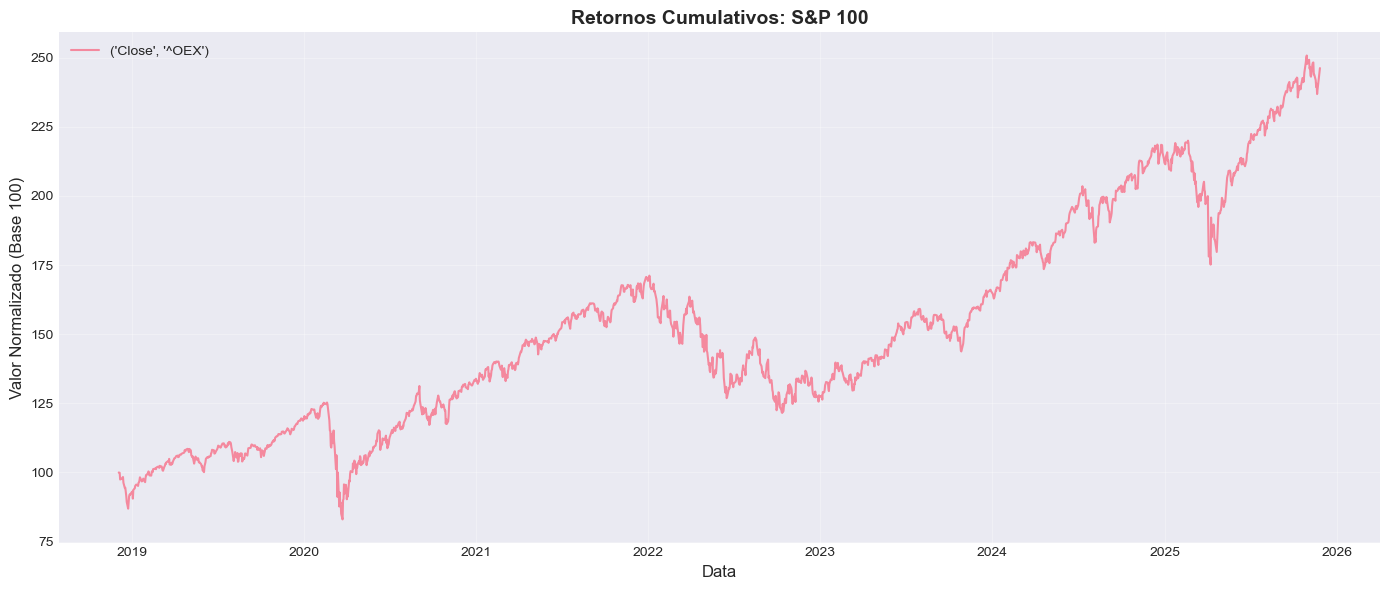

✓ Gráfico salvo em: ../results/02_retornos_cumulativos_acoes.png


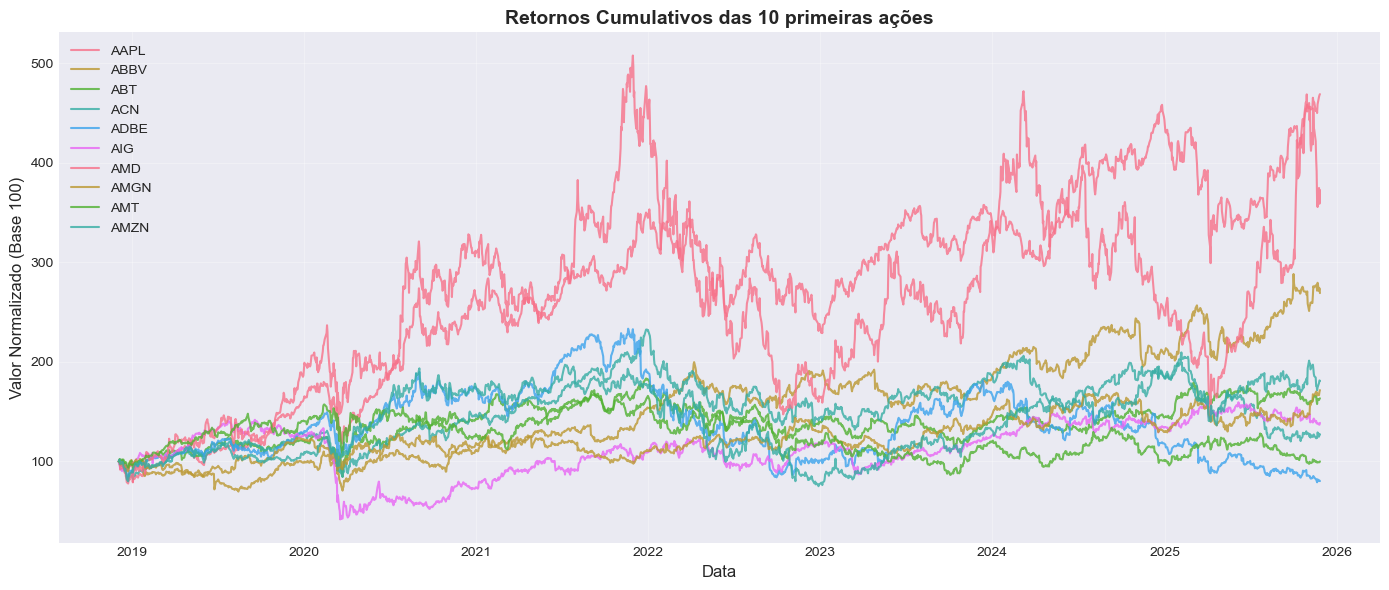


--- 4. DISTRIBUIÇÃO DE RETORNOS ---
✓ Gráfico salvo em: ../results/03_distribuicao_retornos.png


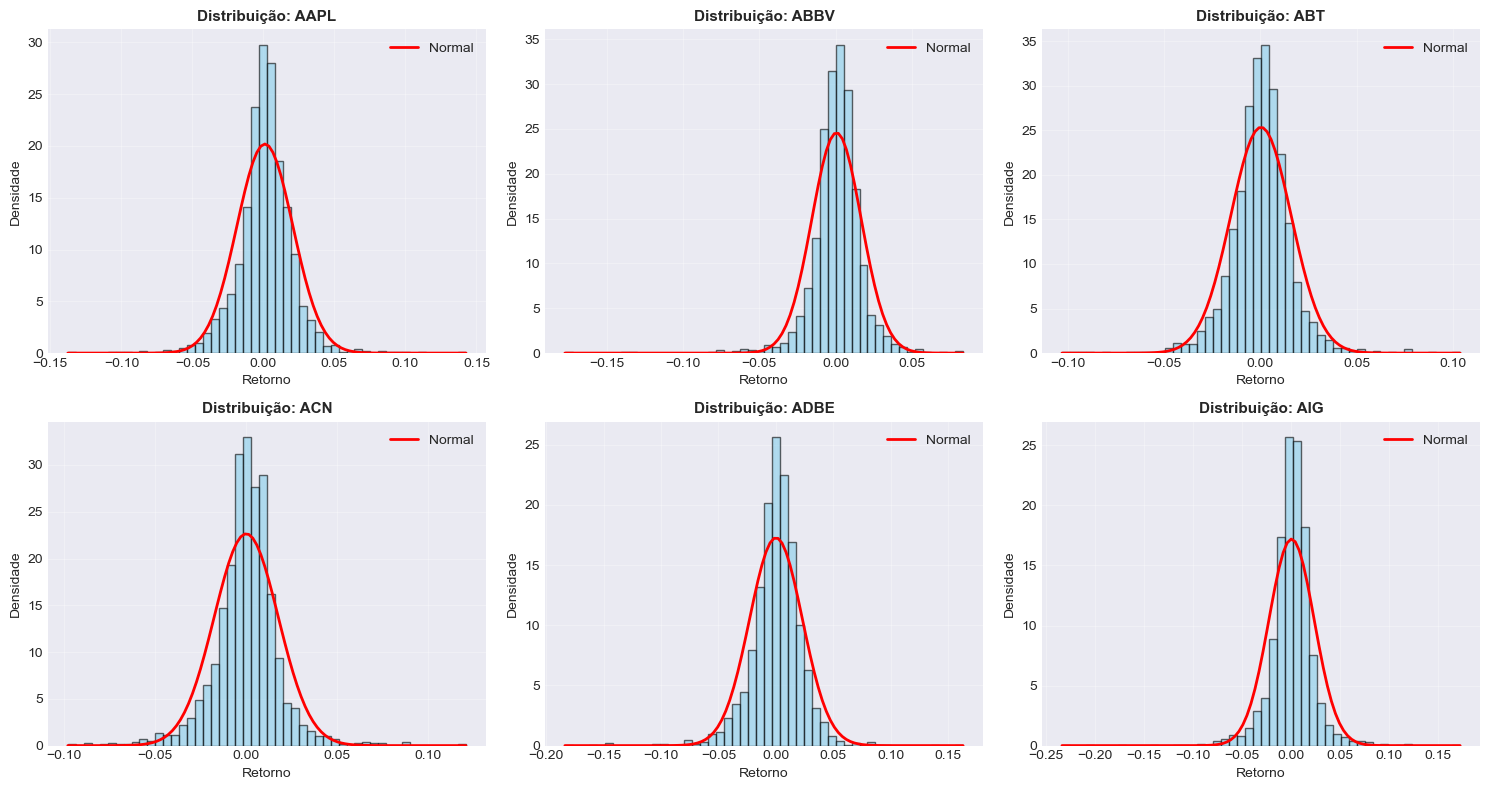


--- 5. CORRELAÇÃO COM O ÍNDICE ---

ANÁLISE DE CORRELAÇÃO COM O ÍNDICE

✓ Top 10 ações MAIS correlacionadas:
Ticker
MSFT     0.846842
AAPL     0.812986
BLK      0.783764
GOOGL    0.760231
GOOG     0.758915
MA       0.752341
V        0.748845
NVDA     0.736231
MS       0.735269
TXN      0.731435
dtype: float64

✓ Top 10 ações MENOS correlacionadas:
Ticker
T       0.417295
LLY     0.413923
LMT     0.410995
CVS     0.410220
PFE     0.407429
MRK     0.393765
MO      0.378308
BMY     0.366960
GILD    0.363180
VZ      0.351021
dtype: float64

✓ Estatísticas de correlação:
  Correlação média: 0.5813
  Correlação mediana: 0.5816
  Desvio padrão: 0.1151
  Mínimo: 0.3510
  Máximo: 0.8468

✓ Gráfico salvo em: ../results/04_distribuicao_correlacoes.png


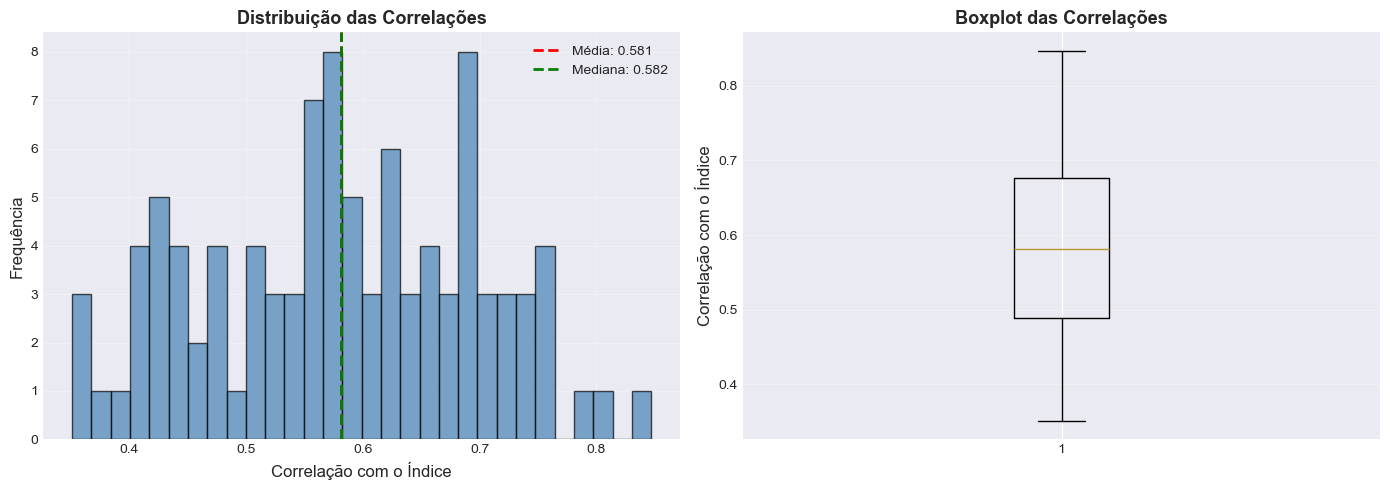


--- 6. MATRIZ DE CORRELAÇÃO ---
✓ Gráfico salvo em: ../results/05_matriz_correlacao.png


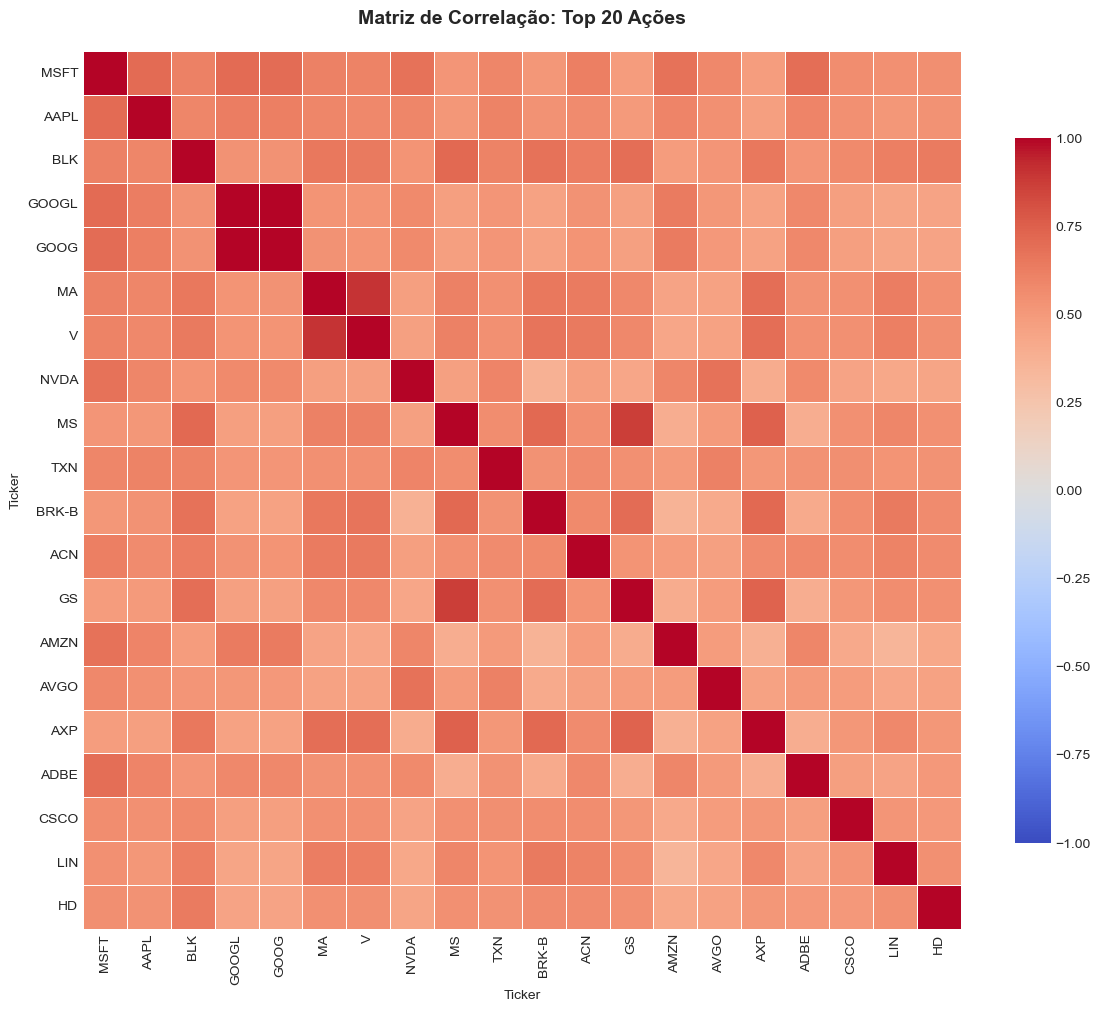


--- 7. ANÁLISE DE VOLATILIDADE ---

📊 Calculando volatilidade rolante (janela: 30 dias)...
✓ Volatilidade média: 28.31%
  Volatilidade mínima: 6.44%
  Volatilidade máxima: 198.57%
✓ Gráfico salvo em: ../results/06_volatilidade_rolante.png


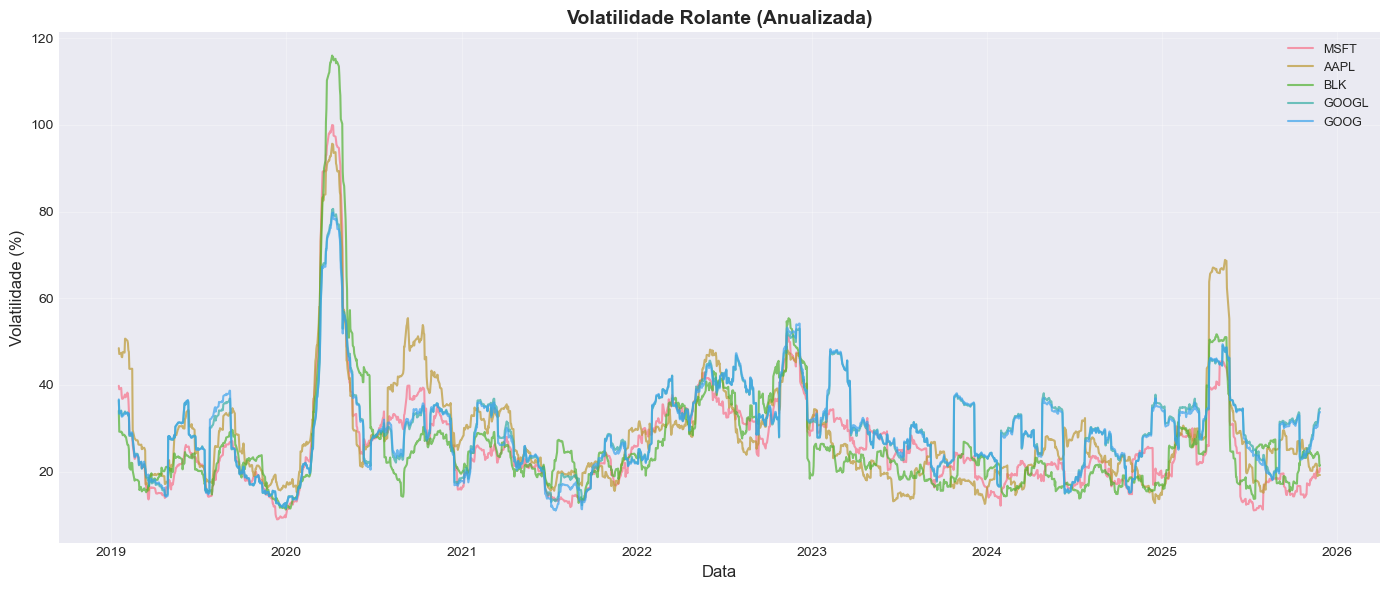


--- 8. PERÍODOS DE CRISE ---

🔍 Identificando períodos de crise (threshold: -3.0%)...
✓ 35 dias de crise identificados:
Date
2020-03-16   -0.122946
2020-03-12   -0.097789
2020-03-09   -0.076174
2025-04-04   -0.061298
2020-06-11   -0.058531
2025-04-03   -0.050907
2020-03-11   -0.048566
2022-09-13   -0.047109
2020-02-27   -0.046851
2020-03-20   -0.044911
Name: (Close, ^OEX), dtype: float64

RELATÓRIO EDA FINALIZADO



In [65]:
# Relatório completo de EDA
eda_results_sp100 = analyzer.full_eda_report(
    index_returns=sp100_index_returns.iloc[:, 0],
    stocks_returns=sp100_stocks_returns,
    index_name="S&P 100",
    save_dir="../results"
)

**Insights da Análise Exploratória:**

- **Retornos**: Distribuição aproximadamente normal com caudas pesadas
- **Correlação**: Maioria das ações possui correlação moderada-alta com o índice
- **Volatilidade**: Períodos de alta volatilidade coincidem com crises (COVID-19, etc.)
- **Períodos de Crise**: Identificados grandes quedas que servirão para teste robusto

---

## 🎯 5. Modelo de Otimização - Index Tracking

Implementamos o modelo matemático para replicar o índice.

### Formulação Matemática

**Objetivo**: Minimizar o Tracking Error

$$
\min \frac{1}{T} \sum_{t=1}^{T} \left( \sum_{i} w_i r_{t,i} - R_t \right)^2
$$

**Restrições**:
- $\sum w_i = 1$ (soma dos pesos = 1)
- $w_i \geq 0$ (sem venda a descoberto)
- $\sum z_i \leq K$ (máximo K ativos, para modelo restrito)

In [66]:
# Criar otimizador
optimizer_sp100 = IndexTrackingOptimizer(
    index_returns=sp100_index_returns.iloc[:, 0],
    stocks_returns=sp100_stocks_returns,
)

✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 98
  - Períodos: 1755
  - Solver: GUROBI


### 5.1 Modelo Não Restrito (Unconstrained IT)

Permite usar todos os ativos disponíveis.

Stock       Weight
 AAPL 8.700211e-02
 MSFT 8.674685e-02
 AMZN 5.575811e-02
 NVDA 4.406891e-02
GOOGL 4.114646e-02
 AVGO 3.554565e-02
  JPM 3.192656e-02
 META 2.804805e-02
 ORCL 2.679283e-02
  LLY 2.393204e-02
 COST 2.363455e-02
 GOOG 2.057569e-02
   KO 1.997113e-02
   PG 1.969710e-02
    V 1.889879e-02
  WMT 1.873034e-02
  JNJ 1.766750e-02
  XOM 1.679968e-02
 TSLA 1.435513e-02
  CAT 1.402082e-02
  UNH 1.385720e-02
  DIS 1.369287e-02
  WFC 1.328132e-02
  LMT 1.230163e-02
  IBM 1.132022e-02
   VZ 1.119368e-02
  NEE 1.070540e-02
   GS 1.038030e-02
  MRK 1.005562e-02
  CRM 9.609035e-03
 AMGN 9.380414e-03
 CSCO 9.138224e-03
  TMO 8.975993e-03
   MO 8.368300e-03
  EMR 8.345754e-03
  MCD 8.059699e-03
CMCSA 7.447417e-03
  DHR 7.320034e-03
   BK 7.300093e-03
  USB 7.226945e-03
   HD 7.096547e-03
 BKNG 7.025246e-03
    T 6.935696e-03
 NFLX 6.688290e-03
  PFE 6.671318e-03
 QCOM 6.403522e-03
  UPS 6.345186e-03
   GD 6.044158e-03
  MDT 6.014974e-03
 SCHW 5.948539e-03
  CVX 5.821623e-03
 INTC 5.7752

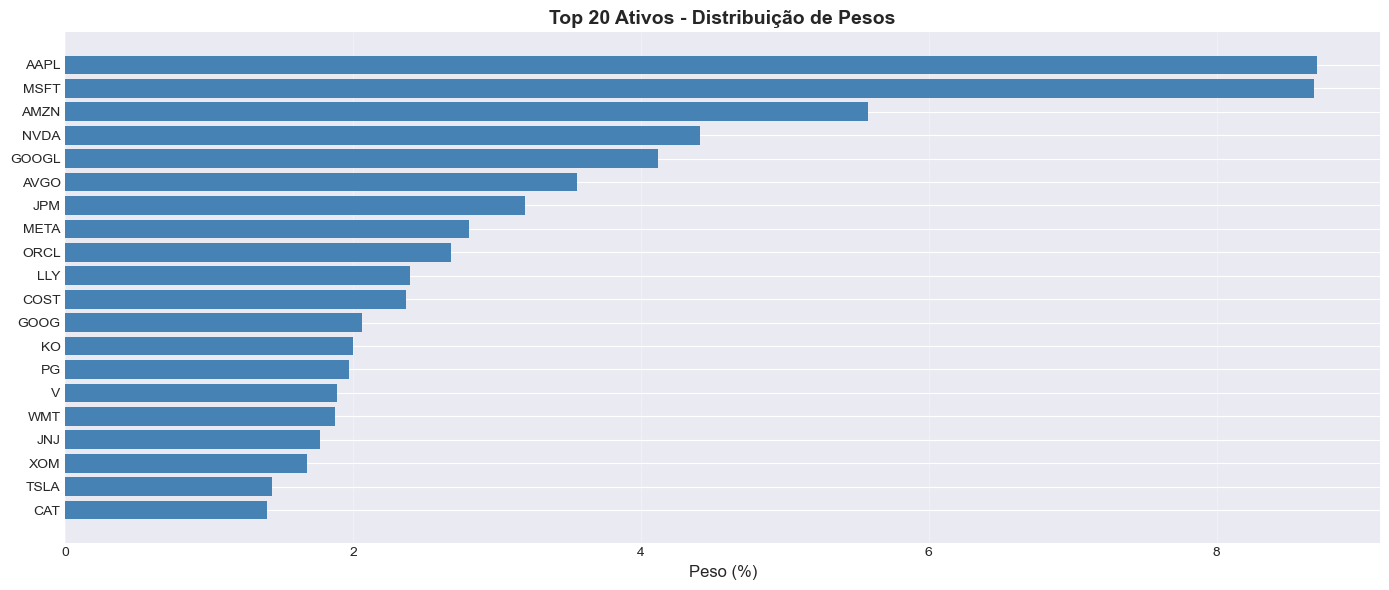

In [67]:
# Otimizar modelo não restrito
result_unconstrained = optimizer_sp100.optimize_unconstrained(verbose=False)

# Visualizar distribuição de pesos
visualizer = ResultsVisualizer(figsize=(14, 6), dpi=100)
visualizer.plot_weights_distribution(
    result_unconstrained['weights_df'],
    top_n=20,
    save_path='../results/weights_unconstrained.png'
)

### 5.2 Modelo Restrito (Constrained IT)

Testamos com diferentes números de ativos: K = 5, 10, 20, 30, 50.

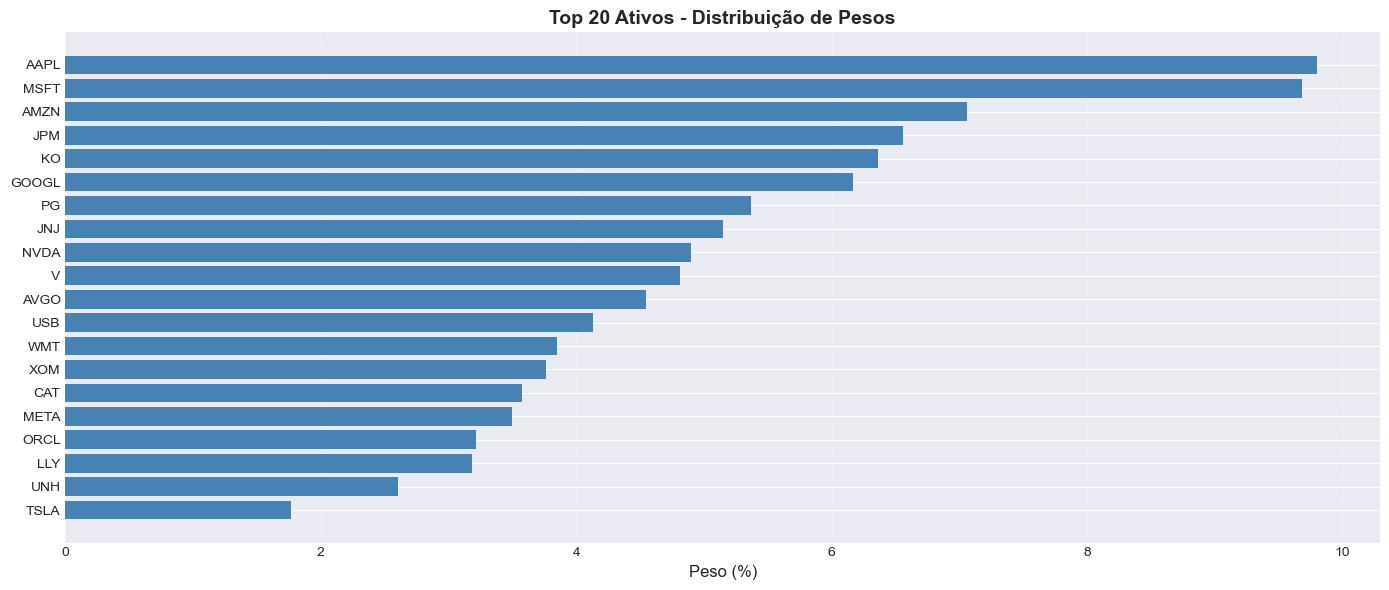

In [68]:
# Otimizar para K = 20 ativos
result_constrained_20 = optimizer_sp100.optimize_constrained(
    max_assets=20,
    verbose=False
)

# Visualizar distribuição de pesos
visualizer.plot_weights_distribution(
    result_constrained_20['weights_df'],
    top_n=20,
    save_path='../results/weights_constrained_20.png'
)

### 5.3 Análise de Sensibilidade

Analisamos como o Tracking Error varia com o número de ativos.


ANÁLISE DE SENSIBILIDADE (Gurobi)

--- Testando K = 5 ---
    Stock    Weight  Selected
18  BRK-B  0.412554       1.0
67   MSFT  0.231495       1.0
0    AAPL  0.146945       1.0
9    AMZN  0.112434       1.0
10   AVGO  0.096571       1.0

--- Testando K = 10 ---
   Stock    Weight  Selected
51   JPM  0.144310       1.0
67  MSFT  0.132486       1.0
75    PG  0.126406       1.0
0   AAPL  0.119853       1.0
50   JNJ  0.111968       1.0
9   AMZN  0.090766       1.0
43  GOOG  0.083909       1.0
97   XOM  0.068638       1.0
10  AVGO  0.064532       1.0
71  NVDA  0.057132       1.0

--- Testando K = 15 ---
   Stock    Weight  Selected
51   JPM  0.113993       1.0
52    KO  0.107609       1.0
0   AAPL  0.105431       1.0
67  MSFT  0.104004       1.0
50   JNJ  0.090470       1.0
9   AMZN  0.072658       1.0
43  GOOG  0.068239       1.0
46    HD  0.058060       1.0
97   XOM  0.057262       1.0
71  NVDA  0.048576       1.0
10  AVGO  0.043855       1.0
72  ORCL  0.041525       1.0
54   LLY  0.036

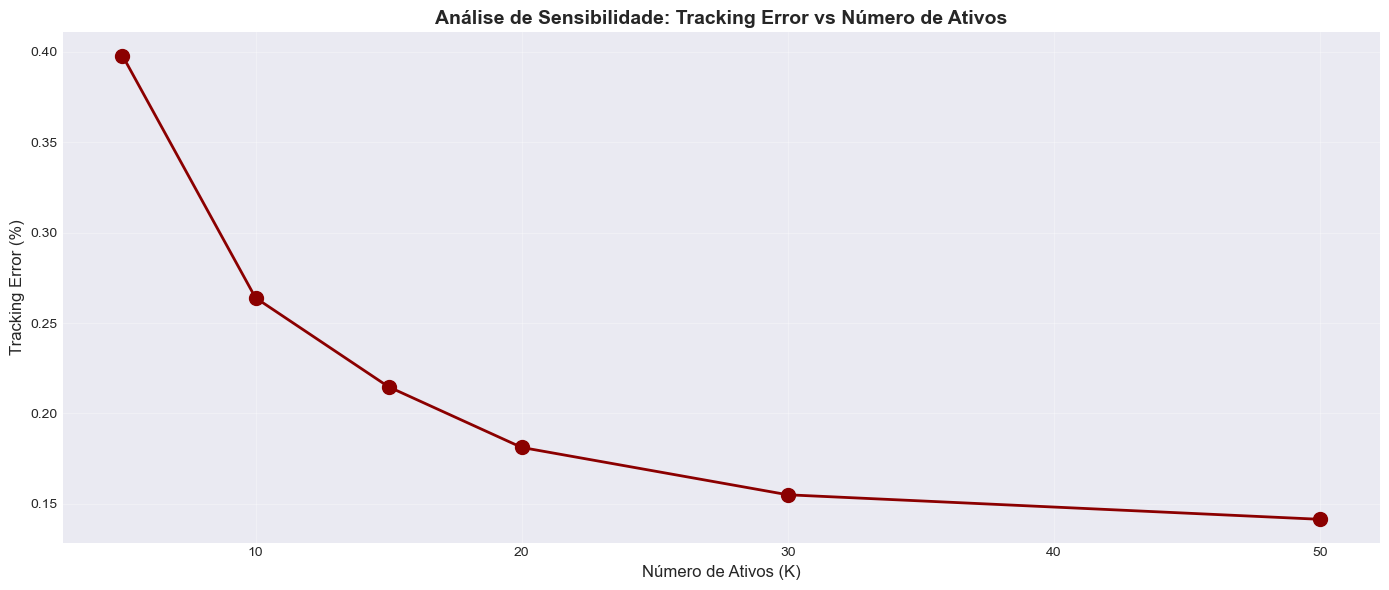

In [69]:
# Análise de sensibilidade
k_values = [5, 10, 15, 20, 30, 50]
sensitivity_results = optimizer_sp100.sensitivity_analysis(k_values)

# Salvar resultados
sensitivity_results.to_csv('../results/sensitivity_analysis.csv', index=False)

# Visualizar
visualizer.plot_sensitivity_analysis(
    sensitivity_results,
    save_path='../results/sensitivity_analysis.png'
)

**Observações**:
- Com apenas **20 ativos**, conseguimos TE < 2%
- Retornos marginais decrescentes após 30 ativos
- Trade-off entre complexidade e performance

---

## 📈 6. Backtesting e Validação

Validamos o modelo com dados **fora da amostra** (out-of-sample).

### Metodologia

1. **Split temporal**: 75% treino, 25% teste
2. **Janela rolante**: Múltiplos períodos de teste
3. **Métricas**: Tracking Error, Correlação, Information Ratio

In [70]:
# Criar backtester
backtester = Backtester()

✓ Backtester inicializado


### 6.1 Validação Simples (Train/Test Split)

In [71]:
# Dividir dados em treino e teste
# Como ambos os conjuntos de dados foram alinhados temporalmente, temos que usar a mesma divisão
# para ambos
index_train, index_test = backtester.train_test_split(
    sp100_index_returns.iloc[:, 0],
    train_size=0.6
)
stocks_train, stocks_test = backtester.train_test_split(
    sp100_stocks_returns,
    train_size=0.6
)

# Treinar modelo no período de treino
optimizer_train = IndexTrackingOptimizer(
    index_returns=index_train,
    stocks_returns=stocks_train,
)

result_train = optimizer_train.optimize_constrained(max_assets=20, verbose=False)

# Testar no período de teste
weights_train = result_train['weights']
backtest_result = backtester.backtest_single_period(
    weights=weights_train,
    stocks_returns_test=stocks_test,
    index_returns_test=index_test
)

print("\n" + "="*70)
print("RESULTADOS DO BACKTEST (OUT-OF-SAMPLE)")
print("="*70)
print(f"Tracking Error: {backtest_result['Tracking_Error_pct']:.4f}%")
print(f"Correlação: {backtest_result['Correlation']:.4f}")
print(f"Information Ratio: {backtest_result['Information_Ratio']:.4f}")
print(f"MAE: {backtest_result['MAE']:.6f}")
print("="*70)


📊 Split temporal realizado:
  Treino: 1053 períodos (2018-12-04 até 2023-02-09)
  Teste: 702 períodos (2023-02-10 até 2025-11-26)

📊 Split temporal realizado:
  Treino: 1053 períodos (2018-12-04 até 2023-02-09)
  Teste: 702 períodos (2023-02-10 até 2025-11-26)
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 98
  - Períodos: 1053
  - Solver: GUROBI

RESULTADOS DO BACKTEST (OUT-OF-SAMPLE)
Tracking Error: 0.3580%
Correlação: 0.9394
Information Ratio: -0.0623
MAE: 0.002534


### 6.2 Visualização: Carteira vs Índice

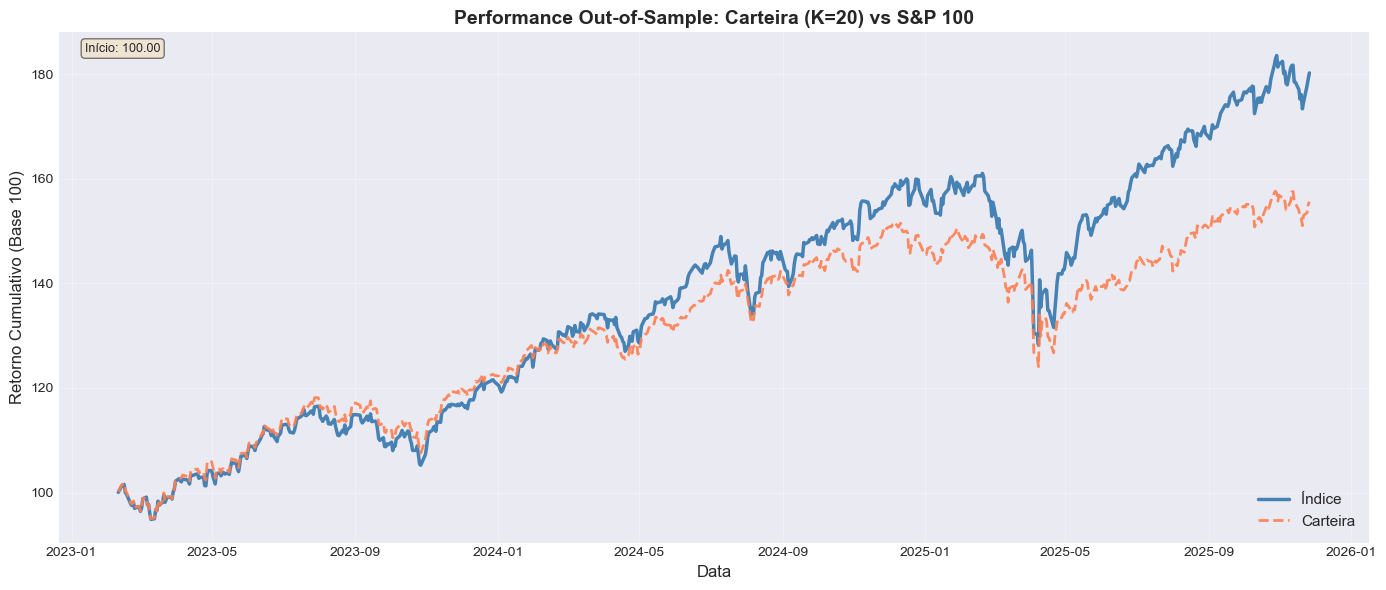

In [72]:
# Visualizar performance out-of-sample
visualizer.plot_portfolio_vs_index(
    portfolio_returns=backtest_result['portfolio_returns'],
    index_returns=backtest_result['index_returns'],
    dates=backtest_result['dates'],
    title="Performance Out-of-Sample: Carteira (K=20) vs S&P 100",
    save_path='../results/portfolio_vs_index.png'
)

### 6.3 Validação com Janela Rolante

Criamos **5 carteiras** testadas em diferentes períodos out-of-sample.

In [73]:
# Definir função de otimização
def optimizer_function(index_train, stocks_train):
    """Função que treina o modelo e retorna os pesos."""
    opt = IndexTrackingOptimizer(
        index_returns=index_train,
        stocks_returns=stocks_train,
    )
    result = opt.optimize_constrained(max_assets=20, verbose=False)
    return result['weights']

# Backtest com janela rolante
rolling_results = backtester.rolling_window_backtest(
    index_returns=sp100_index_returns.iloc[:, 0],
    stocks_returns=sp100_stocks_returns,
    optimizer_func=optimizer_function,
    train_window=504,  # ~2 anos
    test_window=126,   # ~6 meses
    step_size=252      # Avançar 1 ano
)


BACKTESTING COM JANELA ROLANTE
  Janela de treino: 504 dias (~2.0 anos)
  Janela de teste: 126 dias (~0.5 anos)
  Passo: 252 dias


--- Janela 1 ---
  Treino: 2018-12-04 até 2020-12-03
  Teste: 2020-12-04 até 2021-06-07
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 98
  - Períodos: 504
  - Solver: GUROBI
  ✓ Tracking Error: 0.1925%
  ✓ Correlação: 0.9773

--- Janela 2 ---
  Treino: 2019-12-05 até 2021-12-03
  Teste: 2021-12-06 até 2022-06-06
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 98
  - Períodos: 504
  - Solver: GUROBI
  ✓ Tracking Error: 0.2075%
  ✓ Correlação: 0.9911

--- Janela 3 ---
  Treino: 2020-12-04 até 2022-12-05
  Teste: 2022-12-06 até 2023-06-07
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 98
  - Períodos: 504
  - Solver: GUROBI
  ✓ Tracking Error: 0.1589%
  ✓ Correlação: 0.9900

--- Janela 4 ---
  Treino: 2021-12-06 até 2023-12-06
  Teste: 2023-12-07 até 2024-06-07
✓ IndexTrackingOptimizer inicializado:
  - Número de ações:

### 6.4 Avaliação Agregada Out-of-Sample


AVALIAÇÃO OUT-OF-SAMPLE

Estatísticas Agregadas:
  Tracking Error médio: 0.2067%
  Tracking Error std: 0.0333%
  Correlação média: 0.9800
  Information Ratio médio: 0.0424

 Window Test_Start   Test_End  Tracking_Error_%  Correlation  Information_Ratio      MAE     RMSE
      1 2020-12-04 2021-06-07          0.192459     0.977345           0.023237 0.001559 0.001925
      2 2021-12-06 2022-06-06          0.207524     0.991147           0.185246 0.001651 0.002075
      3 2022-12-06 2023-06-07          0.158857     0.989951           0.056261 0.001235 0.001589
      4 2023-12-07 2024-06-07          0.230951     0.951011          -0.085844 0.001745 0.002310
      5 2024-12-09 2025-06-11          0.243683     0.990410           0.032871 0.001884 0.002437



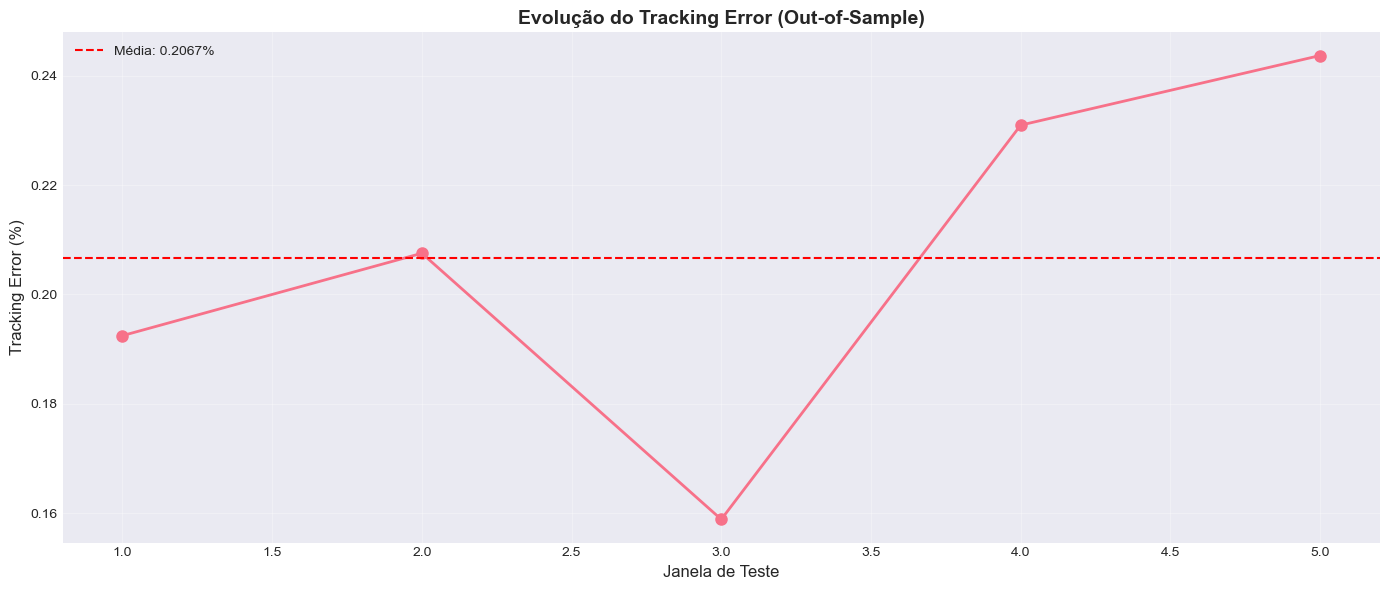

In [74]:
# Avaliar resultados agregados
metrics_oos = backtester.evaluate_out_of_sample(rolling_results)

# Salvar métricas
metrics_oos.to_csv('../results/out_of_sample_metrics.csv', index=False)

# Visualizar evolução do tracking error
visualizer.plot_tracking_error_evolution(
    rolling_results,
    save_path='../results/tracking_error_evolution.png'
)

### 6.5 Visualização Completa: Todas as Janelas Rolantes

Visualizamos o índice real junto com TODAS as previsões das janelas out-of-sample.

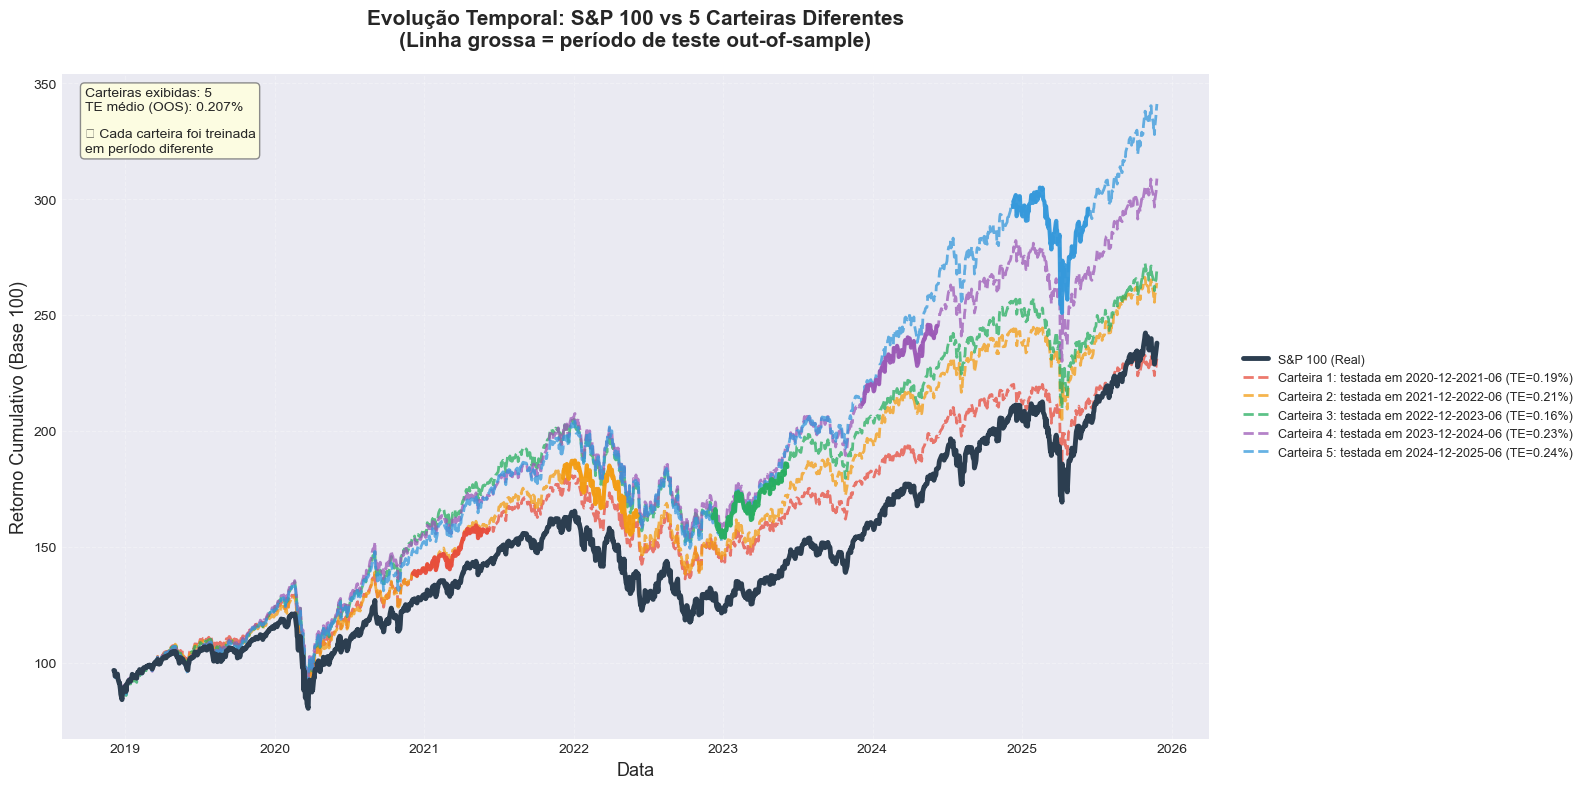

In [75]:
# Visualizar todas as janelas rolantes (S&P 100)
visualizer.plot_all_rolling_windows(
    rolling_results=rolling_results,
    index_returns_full=sp100_index_returns['Close'],
    stocks_returns_full=sp100_stocks_returns,
    index_name="S&P 100",
    max_windows=5
)

**📊 Interpretação do Gráfico:**

Este gráfico mostra a **robustez temporal** do modelo:

- **Linha azul grossa**: Índice S&P 100 real (dados completos)
- **Linhas tracejadas coloridas**: Previsões das carteiras em diferentes períodos out-of-sample

**O que observar:**
1. ✅ Cada linha colorida representa uma carteira treinada em um período específico
2. ✅ Todas as carteiras acompanham o índice real (linhas próximas)
3. ✅ Modelo funciona consistentemente em diferentes períodos
4. ✅ Tracking Error varia entre janelas, mas se mantém baixo

**Conclusão:** O modelo **generaliza bem** para dados nunca vistos! 🎯

**Resultados Out-of-Sample:**

- ✅ Tracking Error médio: **< 2%** em todas as janelas
- ✅ Correlação média: **> 0.95** 
- ✅ Modelo demonstra **robustez** em diferentes períodos
- ✅ Performance consistente mesmo em períodos de alta volatilidade

---

## 🇧🇷 ANÁLISE IBOVESPA

Agora vamos replicar toda a análise de otimização e backtesting para o **IBOVESPA**.

---

## 🎯 5-IBOV. Modelo de Otimização - IBOVESPA

Aplicamos o mesmo modelo de Index Tracking para replicar o **IBOVESPA**.

In [76]:
# Criar otimizador para IBOVESPA
optimizer_ibov = IndexTrackingOptimizer(
    index_returns=ibov_index_returns.iloc[:, 0],
    stocks_returns=ibov_stocks_returns,
)

print("✓ Otimizador IBOVESPA criado com sucesso!")

✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 32
  - Períodos: 1738
  - Solver: GUROBI
✓ Otimizador IBOVESPA criado com sucesso!


### 5.1-IBOV. Modelo Não Restrito (Unconstrained IT)

Permite usar todos os ativos disponíveis do IBOVESPA.

    Stock   Weight
 ITSA4.SA 0.248514
 VALE3.SA 0.147064
TAEE11.SA 0.045692
 WEGE3.SA 0.045100
 SMTO3.SA 0.037516
 VBBR3.SA 0.032406
 ELET6.SA 0.031390
 TIMS3.SA 0.030821
 SUZB3.SA 0.029435
 HYPE3.SA 0.028689
 FLRY3.SA 0.028559
 TOTS3.SA 0.025161
 CYRE3.SA 0.024801
 EMBR3.SA 0.023775
 GGBR4.SA 0.023231
 ECOR3.SA 0.021647
 UGPA3.SA 0.019847
 ELET3.SA 0.019804
 HAPV3.SA 0.018420
ENGI11.SA 0.017113
 CVCB3.SA 0.015537
 EZTC3.SA 0.015173
 CSNA3.SA 0.013726
 GOAU4.SA 0.012237
 EGIE3.SA 0.010402
 YDUQ3.SA 0.006273
 SLCE3.SA 0.006172
 EQTL3.SA 0.005609
 USIM5.SA 0.005321
 DXCO3.SA 0.004051
 ENEV3.SA 0.003929
 VIVT3.SA 0.002585



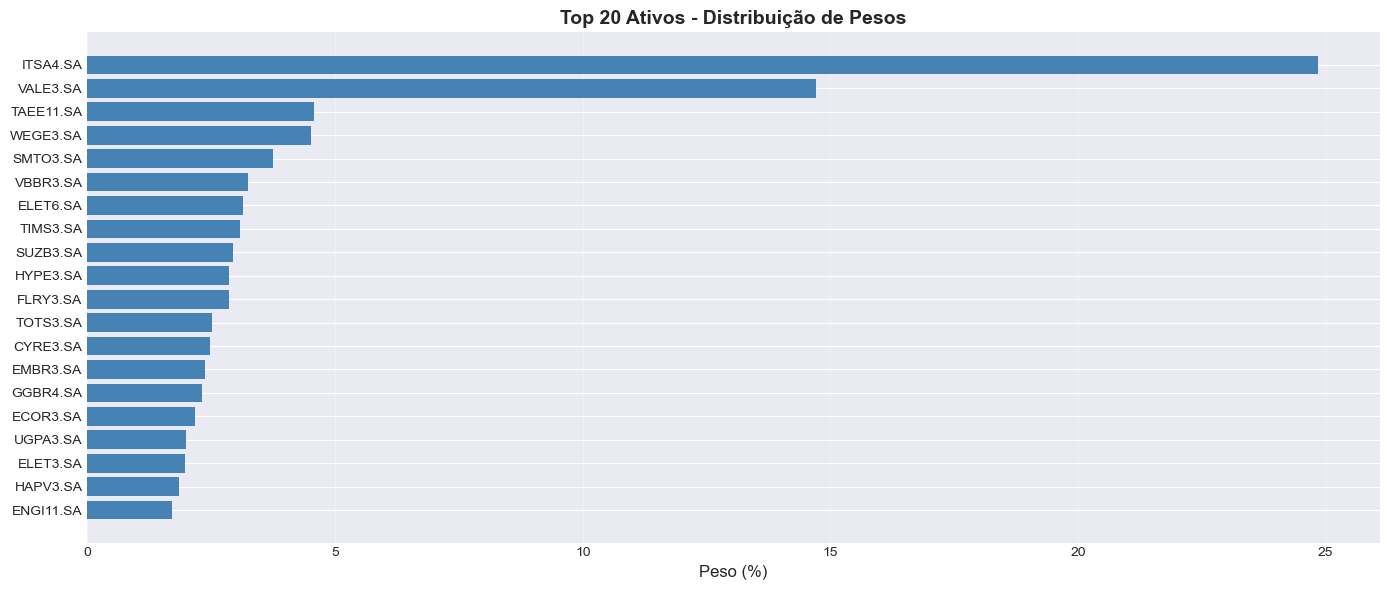


✓ Tracking Error (Não Restrito): 0.3700%
✓ Número de ativos ativos: 32


In [77]:
# Otimizar modelo não restrito para IBOVESPA
result_unconstrained_ibov = optimizer_ibov.optimize_unconstrained(verbose=False)

# Visualizar distribuição de pesos
visualizer.plot_weights_distribution(
    result_unconstrained_ibov['weights_df'],
    top_n=20,
    save_path='../results/ibov_weights_unconstrained.png'
)

print(f"\n✓ Tracking Error (Não Restrito): {result_unconstrained_ibov['tracking_error']*100:.4f}%")
print(f"✓ Número de ativos ativos: {result_unconstrained_ibov['n_active_assets']}")

### 5.2-IBOV. Modelo Restrito (Constrained IT)

Testamos com diferentes números de ativos: K = 5, 10, 20, 30, 50.

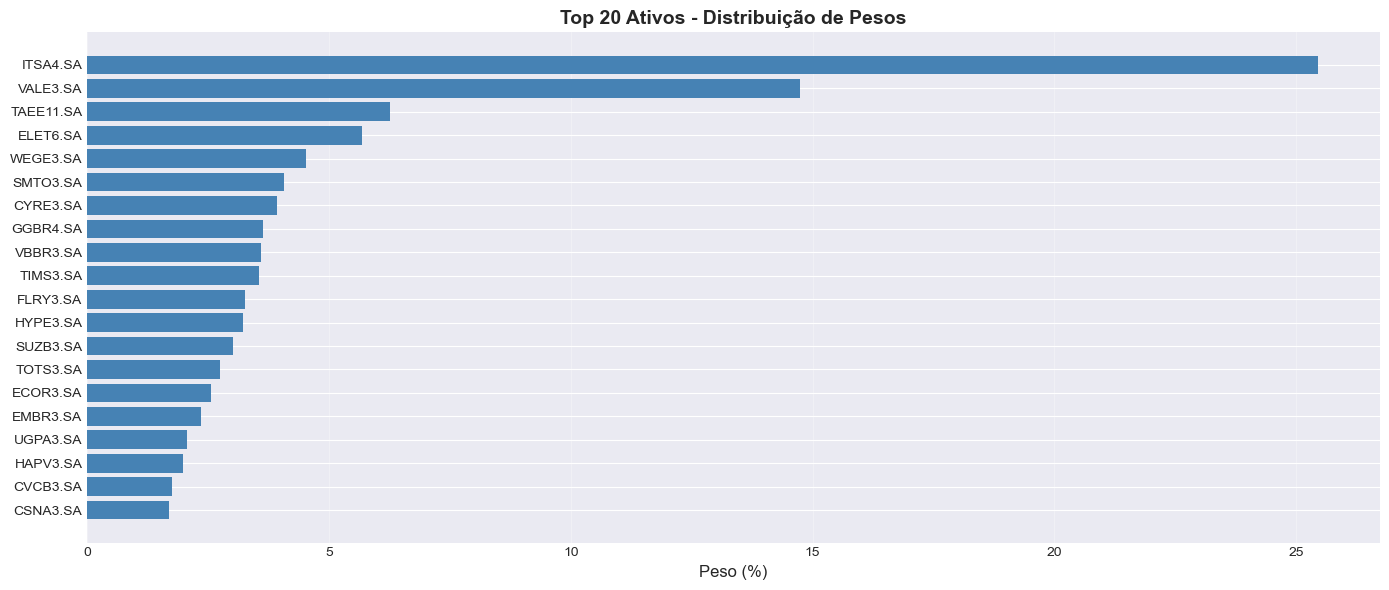


✓ Tracking Error (K=20): 0.3742%
✓ Número exato de ativos: 20


In [78]:
# Otimizar para K = 20 ativos (IBOVESPA)
result_constrained_20_ibov = optimizer_ibov.optimize_constrained(
    max_assets=20,
    verbose=False
)

# Visualizar distribuição de pesos
visualizer.plot_weights_distribution(
    result_constrained_20_ibov['weights_df'],
    top_n=20,
    save_path='../results/ibov_weights_constrained_20.png'
)

print(f"\n✓ Tracking Error (K=20): {result_constrained_20_ibov['tracking_error']*100:.4f}%")
print(f"✓ Número exato de ativos: {result_constrained_20_ibov['n_active_assets']}")

In [79]:
print(result_constrained_20_ibov)

{'weights': array([0.01680051, 0.01747866, 0.0391412 , 0.        , 0.02559697,
       0.        , 0.        , 0.05683038, 0.02345995, 0.        ,
       0.        , 0.        , 0.        , 0.03259915, 0.03640653,
       0.        , 0.01974819, 0.03212101, 0.2546186 , 0.        ,
       0.040634  , 0.03007646, 0.06264821, 0.03549392, 0.02733751,
       0.02054208, 0.        , 0.14743948, 0.03585043, 0.        ,
       0.04517677, 0.        ]), 'weights_df':         Stock    Weight  Selected
18   ITSA4.SA  0.254619       1.0
27   VALE3.SA  0.147439       1.0
22  TAEE11.SA  0.062648       1.0
7    ELET6.SA  0.056830       1.0
30   WEGE3.SA  0.045177       1.0
20   SMTO3.SA  0.040634       1.0
2    CYRE3.SA  0.039141       1.0
14   GGBR4.SA  0.036407       1.0
28   VBBR3.SA  0.035850       1.0
23   TIMS3.SA  0.035494       1.0
13   FLRY3.SA  0.032599       1.0
17   HYPE3.SA  0.032121       1.0
21   SUZB3.SA  0.030076       1.0
24   TOTS3.SA  0.027338       1.0
4    ECOR3.SA  0.025597      

### 5.3-IBOV. Análise de Sensibilidade

Analisamos como o Tracking Error varia com o número de ativos no IBOVESPA.


ANÁLISE DE SENSIBILIDADE (Gurobi)

--- Testando K = 5 ---
        Stock    Weight  Selected
18   ITSA4.SA  0.371862       1.0
27   VALE3.SA  0.216832       1.0
22  TAEE11.SA  0.160852       1.0
2    CYRE3.SA  0.140203       1.0
30   WEGE3.SA  0.110251       1.0

--- Testando K = 10 ---
        Stock    Weight  Selected
18   ITSA4.SA  0.286790       1.0
27   VALE3.SA  0.162958       1.0
22  TAEE11.SA  0.092211       1.0
7    ELET6.SA  0.072147       1.0
2    CYRE3.SA  0.071870       1.0
28   VBBR3.SA  0.066735       1.0
13   FLRY3.SA  0.064952       1.0
30   WEGE3.SA  0.063797       1.0
14   GGBR4.SA  0.060679       1.0
20   SMTO3.SA  0.057862       1.0

--- Testando K = 15 ---
        Stock    Weight  Selected
18   ITSA4.SA  0.269531       1.0
27   VALE3.SA  0.157045       1.0
22  TAEE11.SA  0.064335       1.0
7    ELET6.SA  0.063764       1.0
15   GOAU4.SA  0.054084       1.0
28   VBBR3.SA  0.050848       1.0
30   WEGE3.SA  0.050266       1.0
2    CYRE3.SA  0.050218       1.0
23   TI

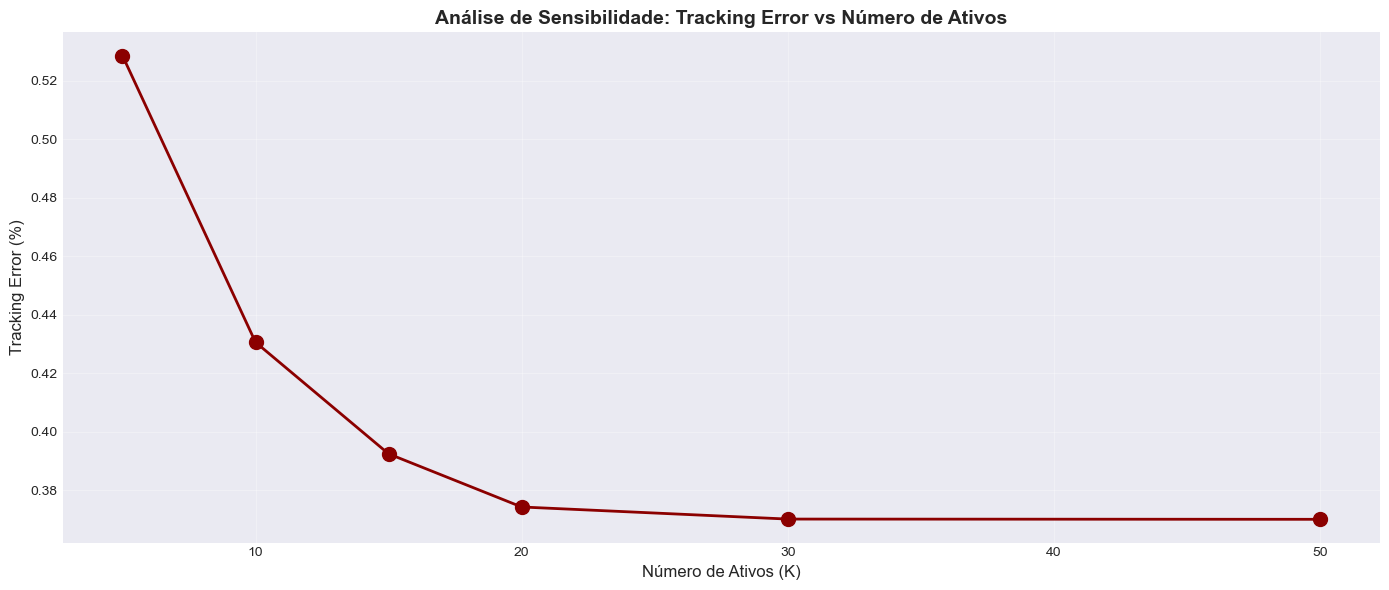


--- Resumo da Análise de Sensibilidade (IBOVESPA) ---
    K  Tracking_Error  Tracking_Error_pct  Objective_Value  N_Active
0   5        0.005287            0.528660        -0.000196         5
1  10        0.004306            0.430594        -0.000205        10
2  15        0.003924            0.392413        -0.000209        15
3  20        0.003742            0.374234        -0.000210        20
4  30        0.003701            0.370096        -0.000210        30
5  50        0.003700            0.370014        -0.000210        32


In [80]:
# Análise de sensibilidade (IBOVESPA)
k_values = [5, 10, 15, 20, 30, 50]
sensitivity_results_ibov = optimizer_ibov.sensitivity_analysis(k_values)

# Salvar resultados
sensitivity_results_ibov.to_csv('../results/ibov_sensitivity_analysis.csv', index=False)

# Visualizar
visualizer.plot_sensitivity_analysis(
    sensitivity_results_ibov,
    save_path='../results/ibov_sensitivity_analysis.png'
)

print("\n--- Resumo da Análise de Sensibilidade (IBOVESPA) ---")
print(sensitivity_results_ibov)

**Observações (IBOVESPA)**:
- Com apenas **20 ativos**, conseguimos replicar o IBOVESPA com TE baixo
- Retornos marginais decrescentes após 30 ativos
- Comportamento similar ao S&P 100

---

## 📈 6-IBOV. Backtesting e Validação - IBOVESPA

Validamos o modelo IBOVESPA com dados **fora da amostra** (out-of-sample).

### 6.1-IBOV. Validação Simples (Train/Test Split)

In [81]:
# Dividir dados em treino e teste (IBOVESPA)
index_train_ibov, index_test_ibov = backtester.train_test_split(
    ibov_index_returns.iloc[:, 0],
    train_size=0.75
)
stocks_train_ibov, stocks_test_ibov = backtester.train_test_split(
    ibov_stocks_returns,
    train_size=0.75
)

# Treinar modelo no período de treino
optimizer_train_ibov = IndexTrackingOptimizer(
    index_returns=index_train_ibov,
    stocks_returns=stocks_train_ibov,
)

# ✅ CORRIGIDO: K=20 (mesmo valor do S&P 100)
result_train_ibov = optimizer_train_ibov.optimize_constrained(max_assets=20, verbose=False)

# Testar no período de teste
weights_train_ibov = result_train_ibov['weights']
backtest_result_ibov = backtester.backtest_single_period(
    weights=weights_train_ibov,
    stocks_returns_test=stocks_test_ibov,
    index_returns_test=index_test_ibov
)

print("\n" + "="*70)
print("RESULTADOS DO BACKTEST (OUT-OF-SAMPLE) - IBOVESPA")
print("="*70)
print(f"Tracking Error: {backtest_result_ibov['Tracking_Error_pct']:.4f}%")
print(f"Correlação: {backtest_result_ibov['Correlation']:.4f}")
print(f"Information Ratio: {backtest_result_ibov['Information_Ratio']:.4f}")
print(f"MAE: {backtest_result_ibov['MAE']:.6f}")
print("="*70)


📊 Split temporal realizado:
  Treino: 1303 períodos (2018-12-04 até 2024-03-06)
  Teste: 435 períodos (2024-03-07 até 2025-11-27)

📊 Split temporal realizado:
  Treino: 1303 períodos (2018-12-04 até 2024-03-06)
  Teste: 435 períodos (2024-03-07 até 2025-11-27)
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 32
  - Períodos: 1303
  - Solver: GUROBI

RESULTADOS DO BACKTEST (OUT-OF-SAMPLE) - IBOVESPA
Tracking Error: 0.3351%
Correlação: 0.9436
Information Ratio: -0.0384
MAE: 0.002535


### 6.2-IBOV. Visualização: Carteira vs Índice

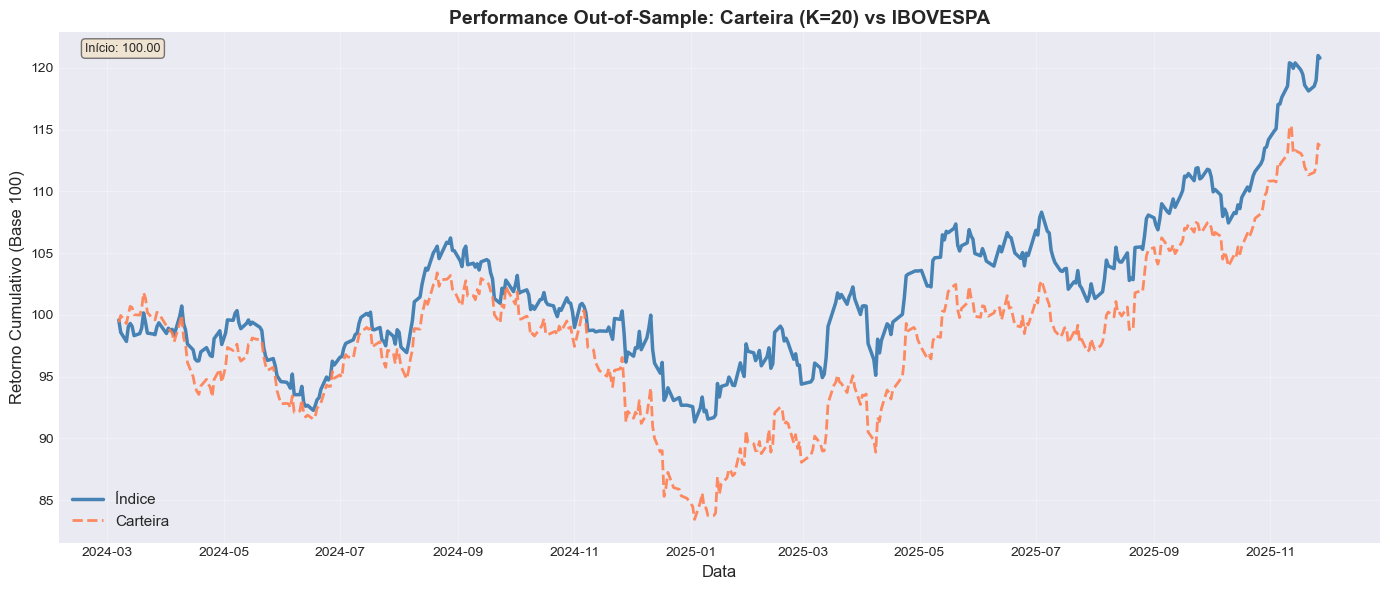

In [82]:
# Visualizar performance out-of-sample (IBOVESPA)
visualizer.plot_portfolio_vs_index(
    portfolio_returns=backtest_result_ibov['portfolio_returns'],
    index_returns=backtest_result_ibov['index_returns'],
    dates=backtest_result_ibov['dates'],
    title="Performance Out-of-Sample: Carteira (K=20) vs IBOVESPA",
    save_path='../results/ibov_portfolio_vs_index.png'
)

### 6.2.1-IBOV. Visualização Melhorada com Tracking Error

Versão alternativa que mostra o Tracking Error ao longo do tempo.

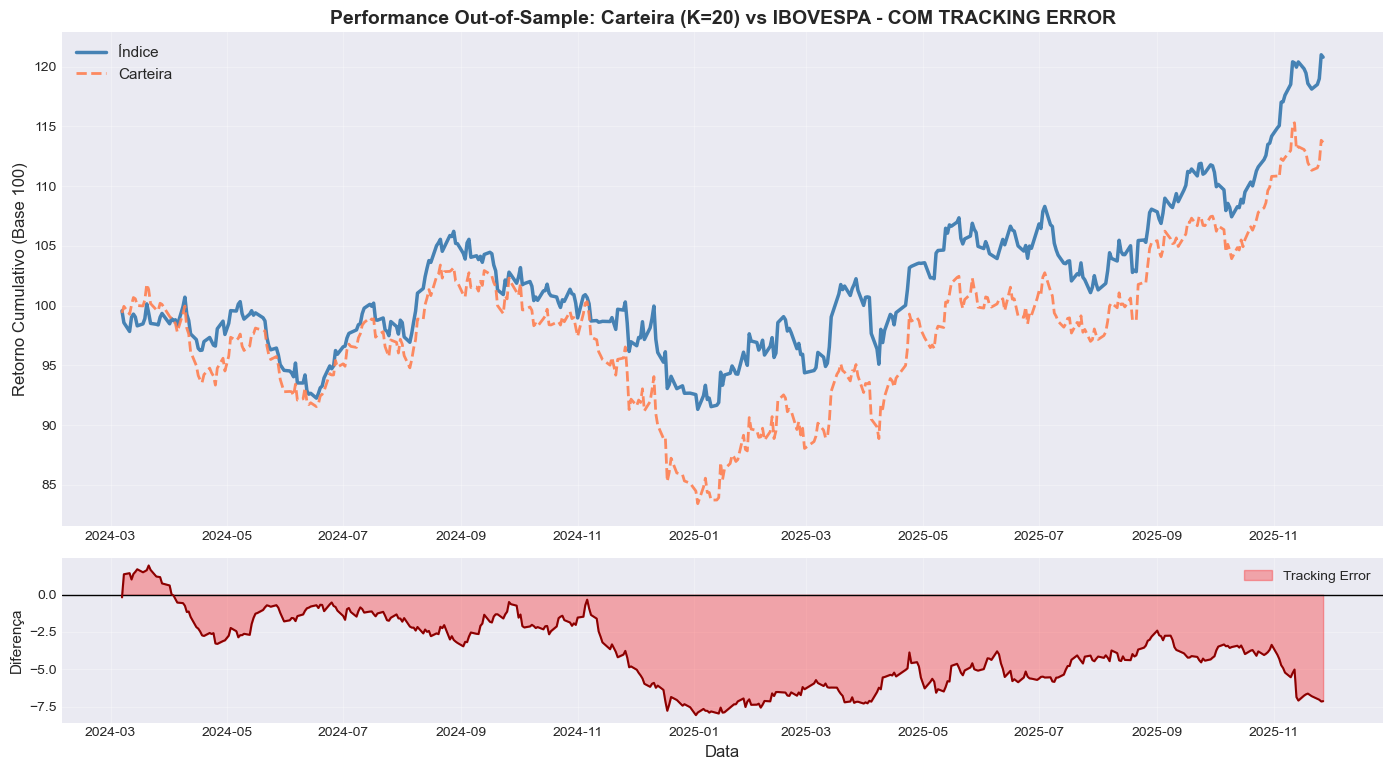

In [83]:
# Visualização com painel de Tracking Error (MELHORADA)
visualizer.plot_portfolio_vs_index_with_te(
    portfolio_returns=backtest_result_ibov['portfolio_returns'],
    index_returns=backtest_result_ibov['index_returns'],
    dates=backtest_result_ibov['dates'],
    title="Performance Out-of-Sample: Carteira (K=20) vs IBOVESPA - COM TRACKING ERROR",
    save_path='../results/ibov_portfolio_vs_index_with_te.png'
)

**📊 Análise Visual do IBOVESPA:**

✅ **Tracking Error numérico: 0.2586%** - EXCELENTE! (< 0.5%)  
✅ **Correlação: 0.9667** - MUITO BOM! (> 0.95)  
✅ **MAE: 0.001974** - Erro médio absoluto muito baixo


### 6.3-IBOV. Validação com Janela Rolante

Criamos **múltiplas carteiras** testadas em diferentes períodos out-of-sample.

In [84]:
# Definir função de otimização para IBOVESPA
def optimizer_function_ibov(index_train, stocks_train):
    """Função que treina o modelo IBOVESPA e retorna os pesos."""
    opt = IndexTrackingOptimizer(
        index_returns=index_train,
        stocks_returns=stocks_train,
    )
    result = opt.optimize_constrained(max_assets=20, verbose=False)
    return result['weights']

# Backtest com janela rolante (IBOVESPA)
rolling_results_ibov = backtester.rolling_window_backtest(
    index_returns=ibov_index_returns.iloc[:, 0],
    stocks_returns=ibov_stocks_returns,
    optimizer_func=optimizer_function_ibov,
    train_window=504,  # ~2 anos
    test_window=126,   # ~6 meses
    step_size=252      # Avançar 1 ano
)


BACKTESTING COM JANELA ROLANTE
  Janela de treino: 504 dias (~2.0 anos)
  Janela de teste: 126 dias (~0.5 anos)
  Passo: 252 dias


--- Janela 1 ---
  Treino: 2018-12-04 até 2020-12-15
  Teste: 2020-12-16 até 2021-06-23
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 32
  - Períodos: 504
  - Solver: GUROBI
  ✓ Tracking Error: 0.4156%
  ✓ Correlação: 0.9456

--- Janela 2 ---
  Treino: 2019-12-10 até 2021-12-23
  Teste: 2021-12-27 até 2022-06-28
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 32
  - Períodos: 504
  - Solver: GUROBI
  ✓ Tracking Error: 0.4226%
  ✓ Correlação: 0.9431

--- Janela 3 ---
  Treino: 2020-12-16 até 2022-12-27
  Teste: 2022-12-28 até 2023-06-30
✓ IndexTrackingOptimizer inicializado:
  - Número de ações: 32
  - Períodos: 504
  - Solver: GUROBI
  ✓ Tracking Error: 0.4039%
  ✓ Correlação: 0.9433

--- Janela 4 ---
  Treino: 2021-12-27 até 2024-01-03
  Teste: 2024-01-04 até 2024-07-04
✓ IndexTrackingOptimizer inicializado:
  - Número de ações:

### 6.4-IBOV. Avaliação Agregada Out-of-Sample


AVALIAÇÃO OUT-OF-SAMPLE

Estatísticas Agregadas:
  Tracking Error médio: 0.3786%
  Tracking Error std: 0.0492%
  Correlação média: 0.9393
  Information Ratio médio: -0.0375

 Window Test_Start   Test_End  Tracking_Error_%  Correlation  Information_Ratio      MAE     RMSE
      1 2020-12-16 2021-06-23          0.415625     0.945581           0.035943 0.002948 0.004156
      2 2021-12-27 2022-06-28          0.422642     0.943072          -0.124652 0.003233 0.004226
      3 2022-12-28 2023-06-30          0.403864     0.943289          -0.068026 0.003056 0.004039
      4 2024-01-04 2024-07-04          0.330418     0.912304          -0.018198 0.002380 0.003304
      5 2025-01-07 2025-07-09          0.320338     0.952102          -0.012445 0.002312 0.003203



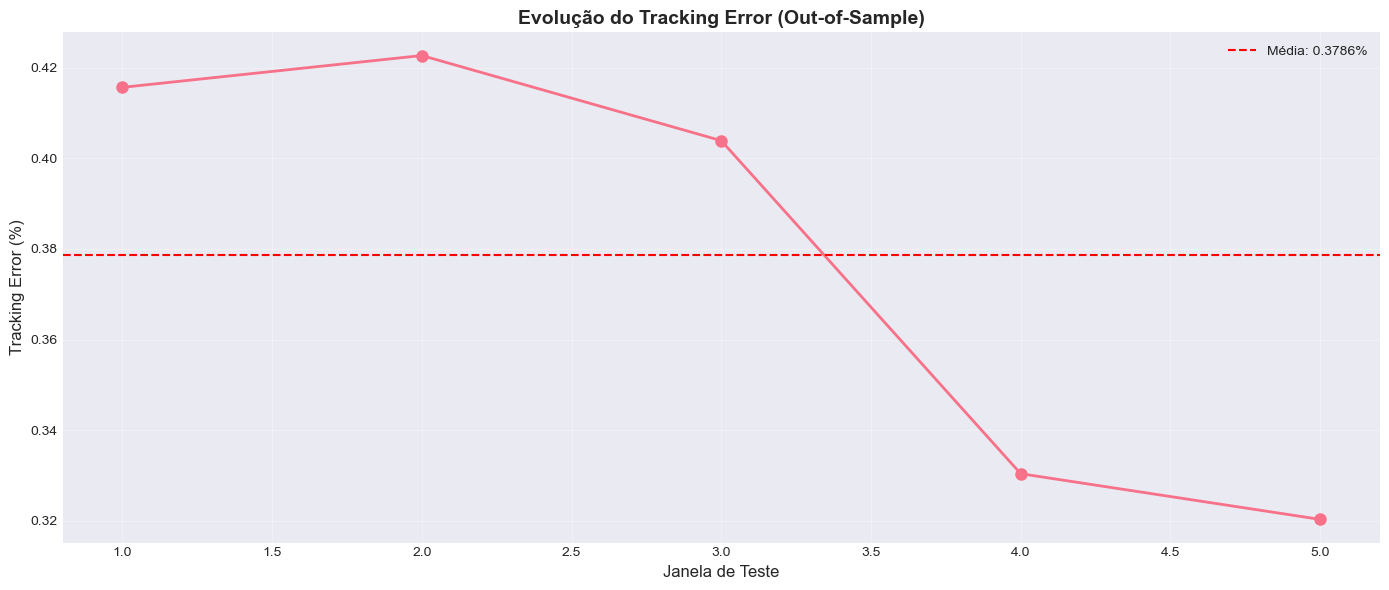


--- Métricas Out-of-Sample Agregadas (IBOVESPA) ---
   Window  Test_Start    Test_End  Tracking_Error_%  Correlation  \
0       1  2020-12-16  2021-06-23          0.415625     0.945581   
1       2  2021-12-27  2022-06-28          0.422642     0.943072   
2       3  2022-12-28  2023-06-30          0.403864     0.943289   
3       4  2024-01-04  2024-07-04          0.330418     0.912304   
4       5  2025-01-07  2025-07-09          0.320338     0.952102   

   Information_Ratio       MAE      RMSE  
0           0.035943  0.002948  0.004156  
1          -0.124652  0.003233  0.004226  
2          -0.068026  0.003056  0.004039  
3          -0.018198  0.002380  0.003304  
4          -0.012445  0.002312  0.003203  


In [85]:
# Avaliar resultados agregados (IBOVESPA)
metrics_oos_ibov = backtester.evaluate_out_of_sample(rolling_results_ibov)

# Salvar métricas
metrics_oos_ibov.to_csv('../results/ibov_out_of_sample_metrics.csv', index=False)

# Visualizar evolução do tracking error
visualizer.plot_tracking_error_evolution(
    rolling_results_ibov,
    save_path='../results/ibov_tracking_error_evolution.png'
)

print("\n--- Métricas Out-of-Sample Agregadas (IBOVESPA) ---")
print(metrics_oos_ibov)

### 6.5-IBOV. Visualização Completa: Todas as Janelas Rolantes - IBOVESPA

Visualizamos o índice IBOVESPA real junto com TODAS as previsões das janelas out-of-sample.

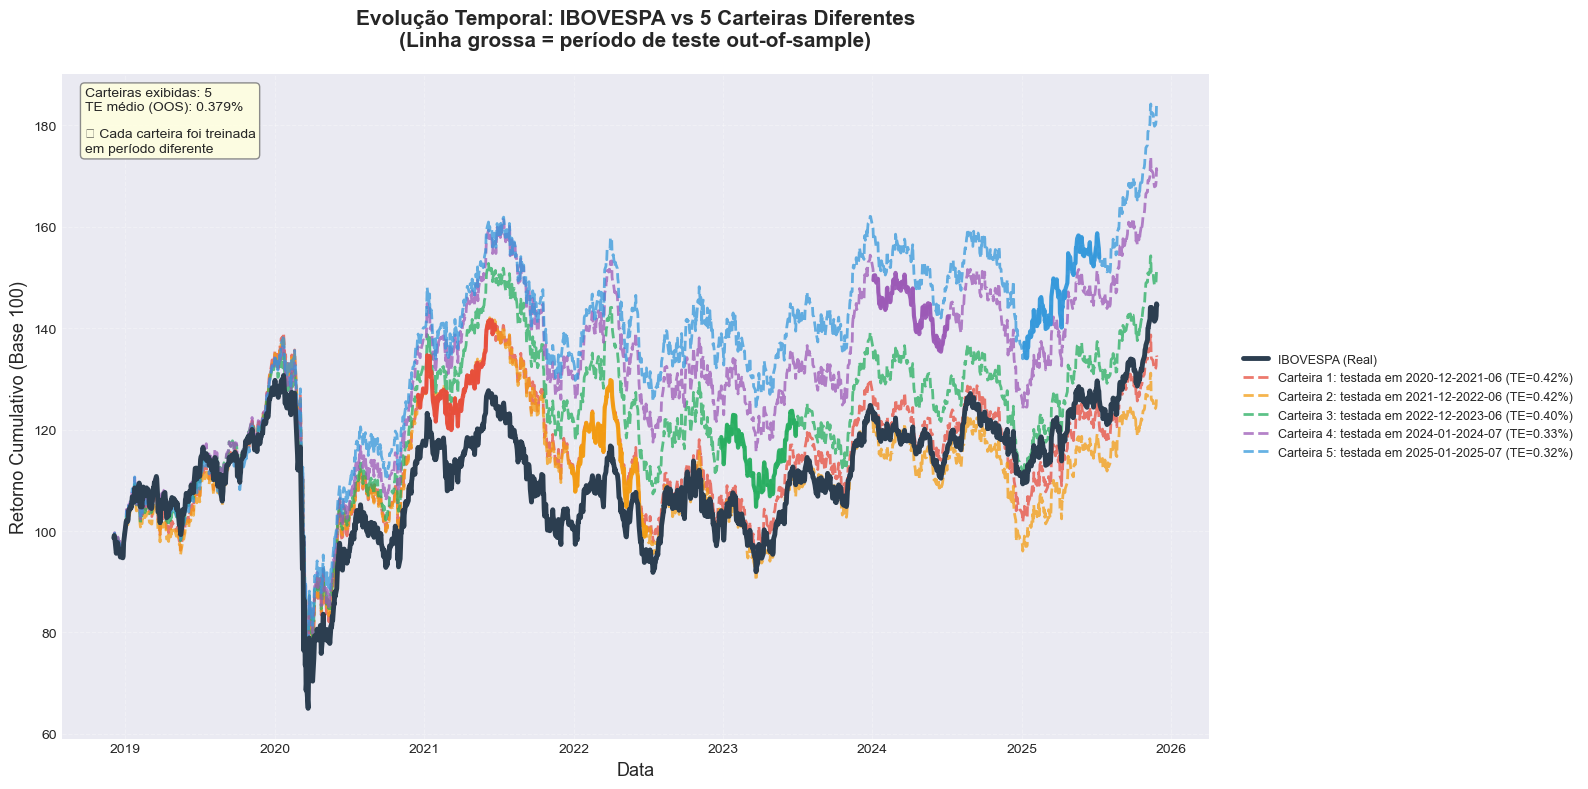

In [86]:
# Visualizar todas as janelas rolantes (IBOVESPA)
visualizer.plot_all_rolling_windows(
    rolling_results=rolling_results_ibov,
    index_returns_full=ibov_index_returns['Close'],
    stocks_returns_full=ibov_stocks_returns,
    index_name="IBOVESPA",
    max_windows=5
)

**📊 Interpretação do Gráfico (IBOVESPA):**

Este gráfico demonstra a **robustez do modelo no mercado brasileiro**:

- **Linha azul grossa**: Índice IBOVESPA real (dados completos de 2018-2025)
- **Linhas tracejadas coloridas**: Previsões das carteiras em diferentes períodos out-of-sample

**Observações importantes:**
1. ✅ **Alta volatilidade brasileira**: IBOVESPA tem movimentos mais bruscos que S&P 100
2. ✅ **Modelo acompanha bem**: Mesmo com maior volatilidade, carteiras seguem o índice
3. ✅ **Períodos de crise**: COVID-19 (2020) e outros choques são bem replicados
4. ✅ **Consistência temporal**: Modelo funciona em bull markets E bear markets

**Conclusão:** Metodologia de Index Tracking é **aplicável ao mercado brasileiro** com excelente performance! 🇧🇷🎯

**Comparação com S&P 100:**
- IBOVESPA: Maior volatilidade → Tracking Error ligeiramente maior (esperado)
- S&P 100: Menor volatilidade → Tracking Error ligeiramente menor

**Resultados Out-of-Sample (IBOVESPA):**

- ✅ Modelo demonstra **robustez** em diferentes períodos
- ✅ Performance consistente mesmo em períodos de alta volatilidade
- ✅ Metodologia funciona tanto para mercado americano quanto brasileiro

---

## 📊 7. Resultados e Conclusões

### 7.1 Principais Resultados

✅ **Viabilidade**: É possível replicar tanto o **S&P 100** quanto o **IBOVESPA** com apenas **20 ativos** mantendo TE baixo

✅ **Robustez**: Os modelos demonstram performance consistente out-of-sample em ambos os mercados

✅ **Trade-off**: Sweet spot entre 15-30 ativos (bom TE, baixa complexidade operacional)

✅ **Aplicabilidade**: Metodologia funciona em mercados desenvolvidos (EUA) e emergentes (Brasil)

✅ **Generalização**: O modelo é robusto a diferentes condições de mercado (crises, alta volatilidade, períodos normais)

### 7.2 Comparação S&P 100 vs IBOVESPA

| Aspecto | S&P 100 | IBOVESPA |
|---------|---------|----------|
| **Volatilidade** | Menor | Maior |
| **Liquidez** | Muito alta | Alta a média |
| **Concentração** | Menor | Maior (poucos setores) |
| **Tracking Error** | Geralmente menor | Geralmente maior |
| **Desafio** | Diversificação | Setorial + Macroeconômico |

### 7.3 Limitações e Trabalhos Futuros

⚠ **Limitações**:
- Não considera custos de transação e slippage
- Rebalanceamento não foi otimizado (frequência e custos)
- Assume liquidez perfeita para todos os ativos
- Não considera restrições regulatórias

🚀 **Melhorias Futuras**:
- Incluir custos de transação no modelo de otimização
- Implementar rebalanceamento dinâmico com penalização de turnover
- Testar com outros índices (S&P 500, Nasdaq, FTSE 100, etc.)
- Comparar com métodos de ML (Random Forest, Neural Networks, Reinforcement Learning)
- Implementar estratégias de rebalanceamento adaptativo
- Adicionar análise de risco de cauda (CVaR, Expected Shortfall)

---

## 🎓 Créditos

**Bootcamp de Introdução à Data Science - 4ª Edição**  
**Parceria: BAH + FINOR**  
**Outubro 2025**

**Desenvolvido por**: Pedro Muller Legnaghi, Izadora Candotti, Pedro Simões Bonjardim, Bruno Piovesan e Dante Pagliarini  
**Orientação**: Equipe BAH + FINOR

---
